In [54]:
import bkp891
import numpy as np
import matplotlib.pyplot as plt

In [55]:
instrument = bkp891.connect("COM10")

In [75]:
meas_Z = list([])
meas_theta = list([])

# meas_freqs = [20, 50, 100, 200, 300, 400, 500, 750, 1000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 90000, 100000]
meas_freqs = np.logspace(np.log10(20), np.log10(300000-1), num=50)

def extract_numbers(s):
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", s)
    return float(numbers[0]) if numbers else None

for freq in meas_freqs:
    instrument.set_frequency(freq)
    datapoint = instrument.fetch()
    meas_points = instrument.fetch()
    float_values = np.vectorize(extract_numbers, otypes=[float])(datapoint)
    meas_Z.append(float_values[0])
    meas_theta.append(float_values[1])

meas_Z = np.array(meas_Z)
meas_theta = np.array(meas_theta)

PortNotOpenError: Attempting to use a port that is not open

In [69]:
22/len(meas_freqs)

0.44

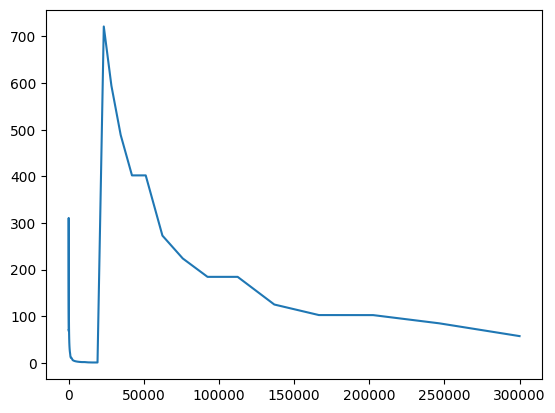

In [73]:
plt.plot(meas_freqs, meas_Z)
# plt.plot(meas_freqs, meas_theta)

plt.show()

In [74]:
instrument.close()